In [1]:
from Iris_recognition import *
from Periocular_recognition import *
import os

In [2]:
def create_iris_norm(img_folder):

    iris_norm_L=[]
    iris_norm_R=[]
   
    for dir1 in tqdm(os.listdir(img_folder)):
        for eye in os.listdir(os.path.join(img_folder, dir1)):
            for file in list(os.listdir(os.path.join(img_folder, dir1, eye))[i] for i in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
                image_path= os.path.join(img_folder, dir1, eye, file)
                img = read_image(image_path)
                _, snake, circles = localization(img, N=400)
                pupil_circle = circles
                iris_circle = np.flip(np.array(snake).astype(int), 1)
                if circles[2] is None:
                    if eye == 'L':
                        iris_norm_L.append(np.zeros((64, 400)))
                    else:
                        iris_norm_R.append(np.zeros((64, 400)))
                else:
                    # Image Preprocessing (Normalization)
                    iris_norm = normalization(img, pupil_circle, iris_circle)
                    if eye == 'L':
                        iris_norm_L.append(iris_norm)
                    else:
                        iris_norm_R.append(iris_norm)
                
    return np.array(iris_norm_L), np.array(iris_norm_R)

In [14]:
iris_norm_L, iris_norm_R = create_iris_norm('Iris-Dataset/CASIA-Iris-Thousand')

  0%|          | 0/1000 [00:00<?, ?it/s]

In [15]:
# np.save('temp_data/iris_norm_L_all.npy', iris_norm_L)
# np.save('temp_data/iris_norm_R_all.npy', iris_norm_R)

In [3]:
iris_norm_L = np.load('temp_data/iris_norm_L_all.npy')
iris_norm_R = np.load('temp_data/iris_norm_R_all.npy')

In [4]:
iris_norm_L.shape, iris_norm_R.shape

((10000, 64, 400), (10000, 64, 400))

In [5]:
def create_fold_norm(fold):
    iris_norm_L_fold = []
    iris_norm_R_fold = []
    for fol in range(1000):
        for item in range(4):
            iris_norm_L_fold.append(iris_norm_L[fol*10+item+fold])
            iris_norm_R_fold.append(iris_norm_R[fol*10+item+fold])
    return np.array(iris_norm_L_fold), np.array(iris_norm_R_fold)

In [12]:
iris_norm_L_fold, iris_norm_R_fold = create_fold_norm(2)

In [13]:
iris_norm_L_fold.shape, iris_norm_R_fold.shape

((4000, 64, 400), (4000, 64, 400))

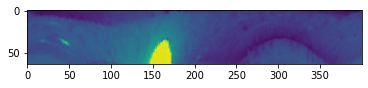

In [14]:
plt.imshow(iris_norm_L_fold[0])

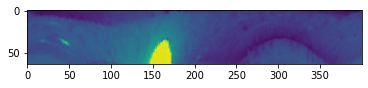

In [15]:
plt.imshow(iris_norm_L[2])

In [5]:
np.where(np.all(iris_norm_L == 0, axis=(1,2)))

(array([ 651,  909, 1512, 1513, 2236, 2237, 2238, 2596, 2989, 3041, 3798],
       dtype=int64),)

In [44]:
# def create_iris_norm_add(img_folder):

#     iris_norm_L = list(np.load('temp_data/iris_norm_L.npy'))
#     iris_norm_R = list(np.load('temp_data/iris_norm_R.npy'))
   
#     for dir1 in tqdm(os.listdir(img_folder)):
#         for eye in os.listdir(os.path.join(img_folder, dir1)):
#             for file in list(os.listdir(os.path.join(img_folder, dir1, eye))[i] for i in [2, 4, 6, 8]):
#                 if int(dir1) > 954:
#                     image_path= os.path.join(img_folder, dir1, eye, file)
#                     img = read_image(image_path)
#                     _, snake, circles = localization(img, N=400)
#                     pupil_circle = circles
#                     iris_circle = np.flip(np.array(snake).astype(int), 1)
#                     if circles[2] is None:
#                         if eye == 'L':
#                             iris_norm_L.append(np.zeros((64, 400)))
#                         else:
#                             iris_norm_R.append(np.zeros((64, 400)))
#                     else:
#                         # Image Preprocessing (Normalization)
#                         iris_norm = normalization(img, pupil_circle, iris_circle)
#                         if eye == 'L':
#                             iris_norm_L.append(iris_norm)
#                         else:
#                             iris_norm_R.append(iris_norm)
#         # np.save('temp_data/iris_norm_L.npy', iris_norm_L)
#         # np.save('temp_data/iris_norm_R.npy', iris_norm_R)
                
#     return np.array(iris_norm_L), np.array(iris_norm_R)

In [45]:
# iris_norm_L, iris_norm_R = create_iris_norm_add('Iris-Dataset/CASIA-Iris-Thousand')

  0%|          | 0/1000 [00:00<?, ?it/s]

In [86]:
img_1_fol = 949
img_1_item = 3
img_1_L = read_image(
    f'Iris-Dataset/CASIA-Iris-Thousand/{str(img_1_fol).zfill(3)}/L/S5{str(img_1_fol).zfill(3)}L{str((img_1_item + 1)*2).zfill(2)}.jpg')
img_1_R = read_image(
    f'Iris-Dataset/CASIA-Iris-Thousand/{str(img_1_fol).zfill(3)}/R/S5{str(img_1_fol).zfill(3)}R{str((img_1_item + 1)*2).zfill(2)}.jpg')


In [87]:
img = img_1_R

_, snake, circles = localization(img, N=400)

pupil_circle = circles
iris_circle = np.flip(np.array(snake).astype(int), 1)

if circles[2] is None:
    print('No Iris')
else:
    # Image Preprocessing (Normalization)
    iris_norm = normalization(img, pupil_circle, iris_circle)

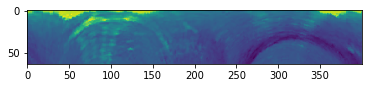

In [88]:
plt.imshow(iris_norm)

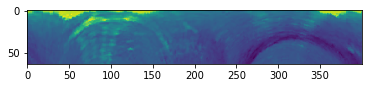

In [89]:
plt.imshow(iris_norm_R[(img_1_fol)* 4 + img_1_item])